# Bank Churners

***The objective of this analysis is to build a classification model that predicts customer attrition, in order to personalize the retention campaigns to the customers most likely to leave, optmizing the company's budget***

### What is Attrition ?
The  process of reudcing something's strength or effectiveness through sustained attack or pressure. Attrition occurs when the workforce dwindles at a company as people leave and are replaced Attrition is often called a hiring freeze and is seen as **a less disruptive way to trim the workfoce and reduce payroll than layoffs**

**Since we are trying to predict attrition, the best model will be one that covers the most attrited customers from our test dataset (we wont care mucn for the false positives)**

In [2]:
# Importing all the libraries necessary

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


from matplotlib import figure
from IPython.display import Image
import re
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix , classification_report


from sklearn.model_selection import cross_val_score, KFold

import scipy.stats
from scipy.stats import chi2




In [3]:
# Exploring The Data

df_explore = pd.read_csv('BankChurners.csv')
print(df_explore.head(10))

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue  

In [4]:
# Printing out all the columns

df_explore.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
# Seeing what the Naive_Bayes_Classifier Column holds in terms of data.

'''for index, row in df_explore.iterrows():
    print(index, row['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])'''

0 9.3448e-05
1 5.6861e-05
2 2.1081e-05
3 0.00013366
4 2.1676e-05
5 5.5077e-05
6 0.00012303
7 8.5795e-05
8 4.4796e-05
9 0.00030251
10 0.00019094
11 0.00019751
12 4.7799e-05
13 9.6126e-05
14 0.00011382
15 6.3492e-05
16 0.00023623
17 0.00014953
18 0.00017468
19 5.5077e-05
20 5.703e-05
21 0.99616
22 6.9242e-05
23 0.00020735
24 0.00021042
25 5.7151e-05
26 5.0256e-05
27 0.00018558
28 0.00012144
29 7.6642e-06
30 0.00021834
31 0.00012458
32 5.7762e-05
33 0.00018612
34 9.7673e-05
35 6.2639e-05
36 0.00019864
37 0.00035532
38 0.00016883
39 0.9978
40 0.00011811
41 2.2331e-05
42 0.00015785
43 6.9242e-05
44 0.00031726
45 0.00020643
46 6.0759e-05
47 0.0001546
48 0.00030516
49 3.031e-05
50 0.00020516
51 0.99028
52 0.00018134
53 4.6151e-05
54 0.99671
55 0.00022797
56 4.3568e-05
57 0.00019683
58 5.6861e-05
59 0.00035539
60 0.00021834
61 0.99823
62 0.00027604
63 0.00026824
64 0.00011065
65 0.00015398
66 0.00029411
67 0.00031104
68 0.00011382
69 0.00016471
70 0.00020077
71 0.00030251
72 0.00017969
73 0.00

### Since the data already has a Naive Bayes Classifier for the data, we need to drop it as it will give the prediction algoritm an advantage.

In [6]:
# Dropping the Naive_Bayes_Classifier columns (There are 2 in the dataset)

df = df_explore.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.columns 

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
# Listing all the columns in the dataset and lookinng some info about the data
print('-------------Columns-------------')
print(list(df.columns))
print('\n')
print('-------------Dataset-------------')
print(df.info)

-------------Columns-------------
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


-------------Dataset-------------
<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...      

In [8]:
#Check for duplicate
print('---Check for duplicate---')
print(df[df.duplicated(keep=False)])
print('\n')

print('---Check for duplicate IDS---')
print(df.duplicated(subset=['CLIENTNUM']).unique())
print('\n')

#check for Unknown Values
print('---Check for Unknowns---')
print(df[df == 'Unknown'].count())
print('\n')

#Check for Zero Values
print('---Check for 0 Values---')
df[df == 0].count()


---Check for duplicate---
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


---Check for duplicate IDS---
[False]


---Check for Unknowns---
CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count              904
Education_Level                0
Marital_Status                 0
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon        29
Contacts_Count_12_mon        399
Credit_Limit                   0
Total_Revolving_Bal         2470
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           5
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            7
Avg_Utilization_Ratio       2470
dtype: int64

In [9]:
# Counting the Attrition Flags

aggregate_data = df.groupby(['Attrition_Flag'])['CLIENTNUM'].count().to_frame().reset_index()
aggregate_data

,Attrition_Flag,CLIENTNUM
0,Attrited Customer,1627
1,Existing Customer,8500


In [10]:
# A pie plot to better represent the data

labels = aggregate_data.Attrition_Flag
values = aggregate_data.CLIENTNUM

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.90,
    xanchor="left",
    x=0.20
))

[Text(0, 0, '8500'), Text(0, 0, '1627')]

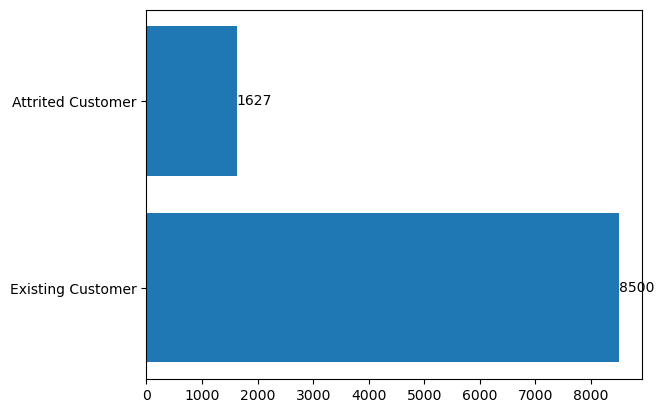

In [11]:
#Choose between these two plots.

x = ['Existing Customer','Attrited Customer']
y = [df['Attrition_Flag'].value_counts()[0],df['Attrition_Flag'].value_counts()[1]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)


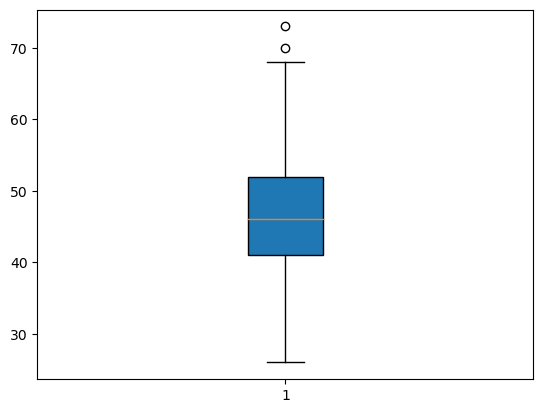

In [12]:
plt.boxplot(df['Customer_Age'],patch_artist=True);


In [10]:
# Mapping the target varibale (Attrition_Flag -> Attrited Customer, Existing Customer) to numeric values

df['Attrition_Flag'] = df.Attrition_Flag.map({'Attrited Customer': 1, 
                                                    'Existing Customer':0})
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Lets check if we can make any observations from the other columns in  the dataset
#### Checking Categorical Variables

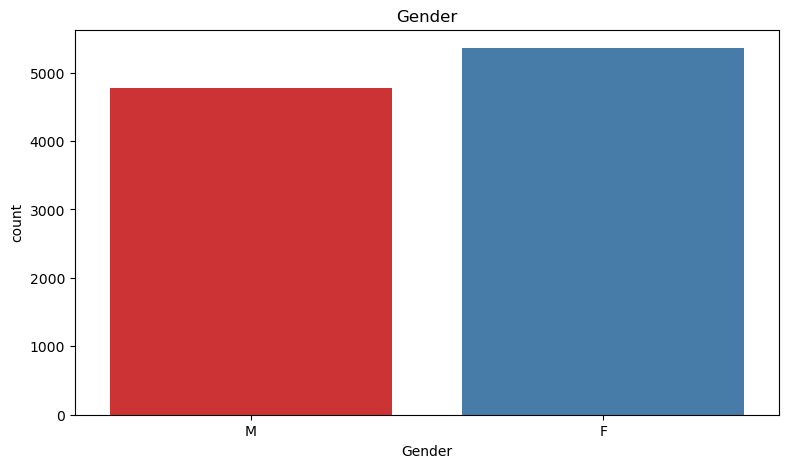

In [11]:
# Observation based on Gender

plt.figure(figsize=(20,35))
plt.subplot(6,2,1)
plt.gca().set_title('Gender')
sns.countplot(x ='Gender', palette ='Set1', data =df)
plt.show()

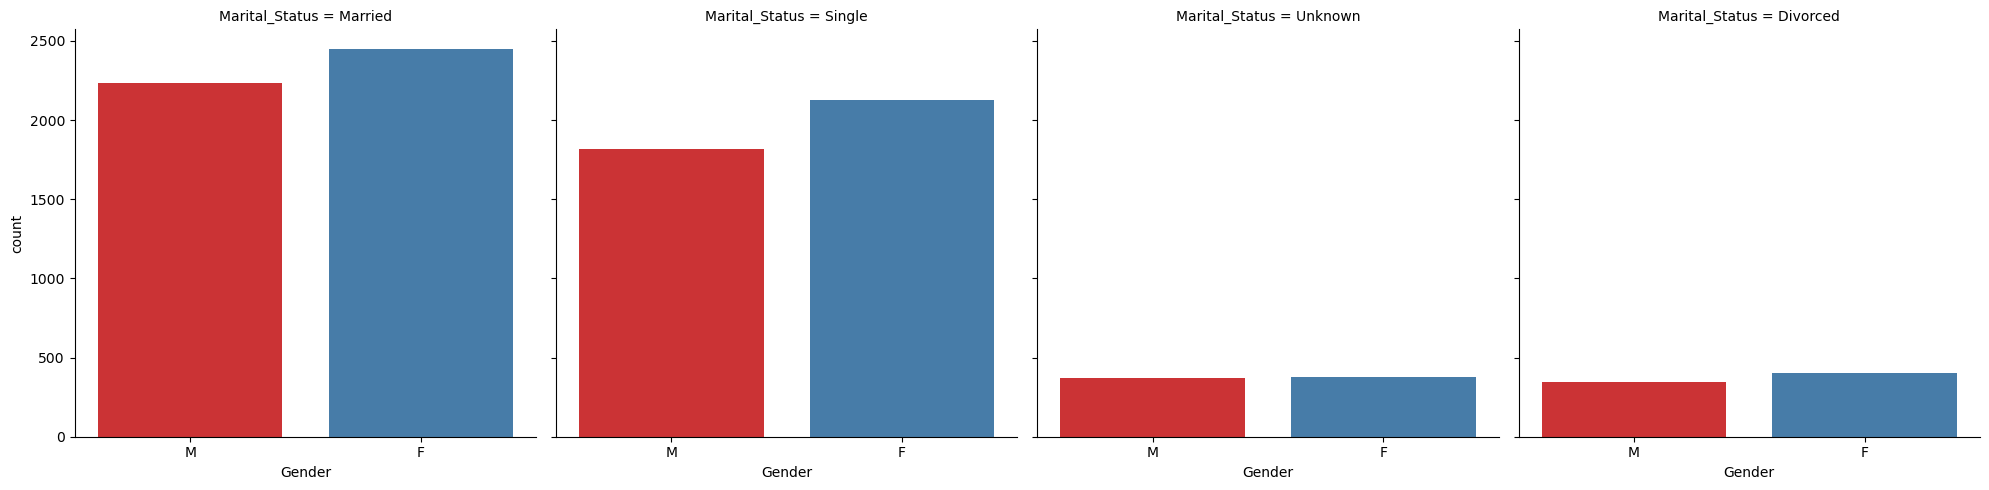

In [15]:
sns.catplot(x='Gender',data=df,palette='Set1',kind='count',col='Marital_Status');


In [12]:
# Creating a Crosstab to check the relation between Attrition Flag and Gender

cross_tab = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'])


cross_tab_prop = pd.crosstab(index=df['Gender'],
                        columns=df['Attrition_Flag'],
                             normalize="index")

#cross_tab_prop = cross_tab_prop.reset_index()
cross_tab_prop



Attrition_Flag,0,1
Gender,,
F,0.826428,0.173572
M,0.853848,0.146152


In [13]:
# Reset Index

cross_tab_prop = cross_tab_prop.reset_index()


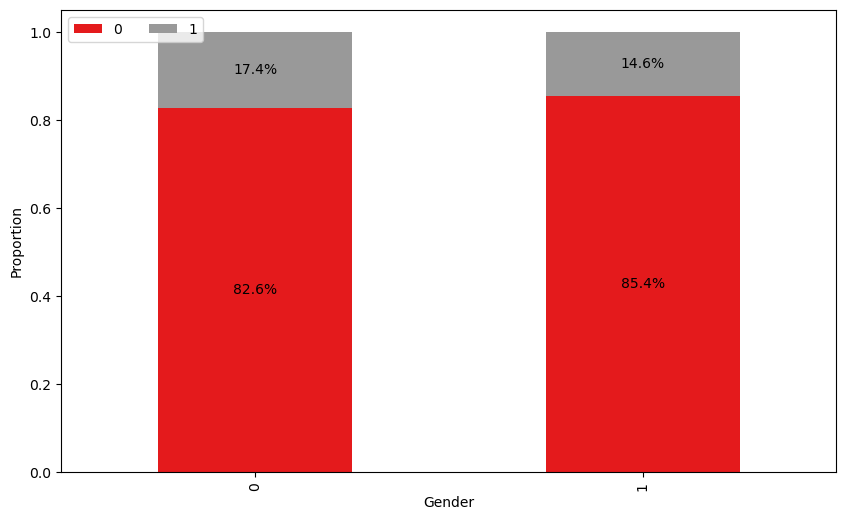

In [14]:
# Plotting the proportion of each gender w.r.t to the attrition flags

ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [15]:
# Checking if the difference between the two group is statiscaly significant.

# Checking if the difference between the two groups is statiscally significant 
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)
print('\n')


chi2 statistic:     13.866
p-value:            0.00019636
degrees of freedom: 1
expected frequencies:
 [[4497.18574109  860.81425891]
 [4002.81425891  766.18574109]]




### Education Level

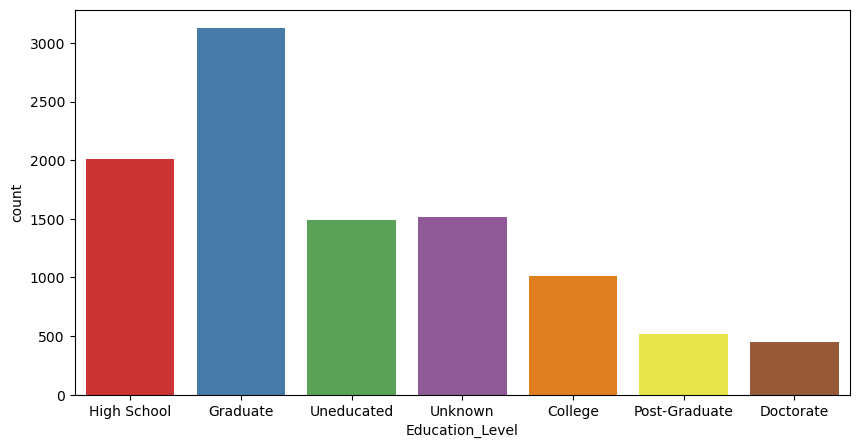

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Education_Level',data=df,palette='Set1');

### Total Relationship_Count
#### Total number of relationships customer has with the credit card provider. (Integer)

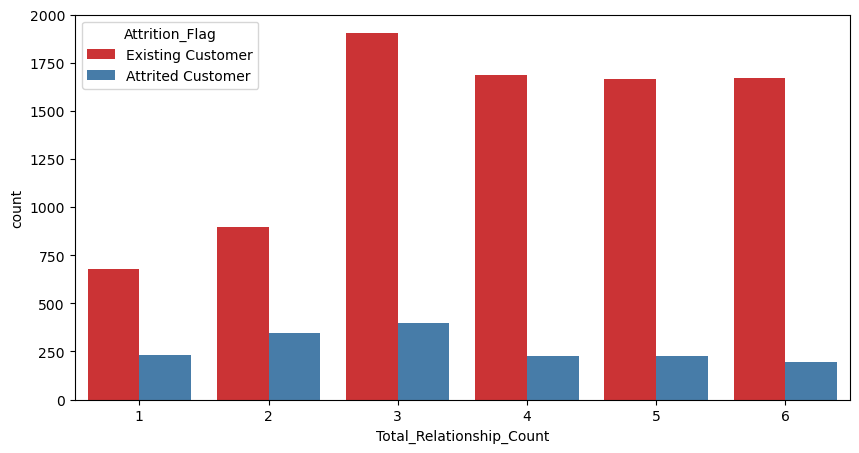

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Total_Relationship_Count',data=df,palette='Set1',hue='Attrition_Flag');

Contacts_Count_12_mon VS. Months_Inactive_12_mon

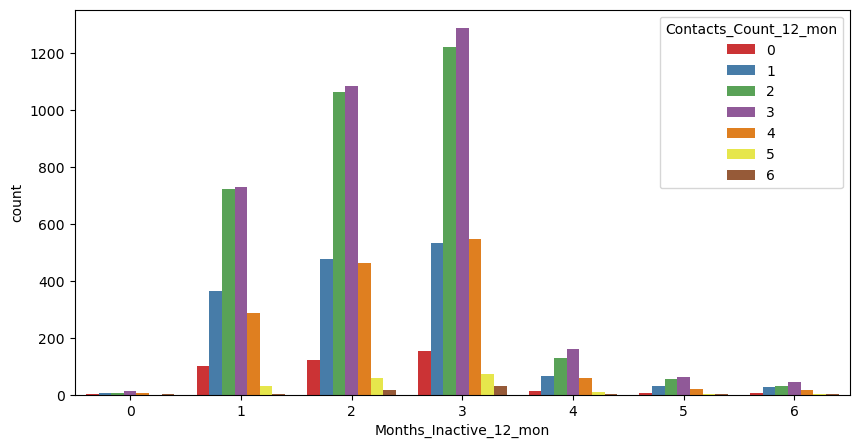

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Months_Inactive_12_mon',data=df,palette='Set1',hue='Contacts_Count_12_mon');

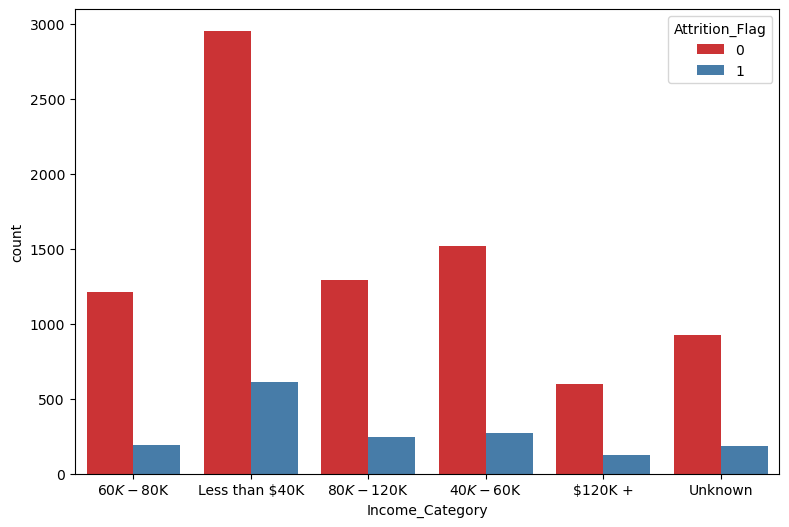

In [16]:
# Plotting the income ranges for attrition flags 

plt.figure(figsize = (20,35))
plt.subplot(5,2,10)
sns.countplot(x = 'Income_Category', hue = 'Attrition_Flag', palette = 'Set1', data = df, )
plt.show()

In [17]:
# Crosstab for income range 

cross_tab = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'])

cross_tab_prop = pd.crosstab(index=df['Income_Category'],
                        columns=df['Attrition_Flag'],
                             normalize="index")

cross_tab_prop

Attrition_Flag,0,1
Income_Category,,
$120K +,0.826685,0.173315
$40K - $60K,0.848603,0.151397
$60K - $80K,0.865193,0.134807
$80K - $120K,0.842345,0.157655
Less than $40K,0.828138,0.171862
Unknown,0.831835,0.168165


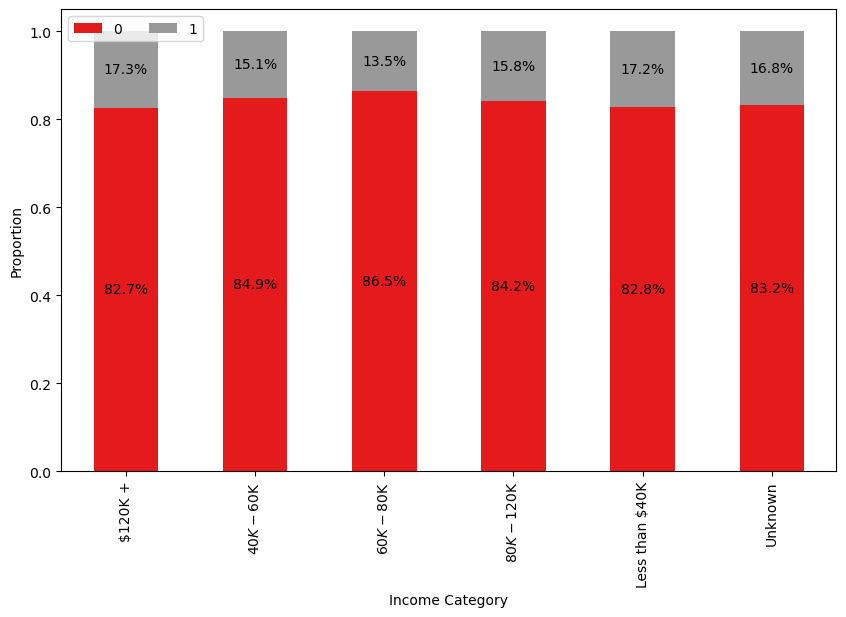

In [18]:
# Plotting the proportion of each income_category w.r.t to the attrition flags

ax = cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Income Category")
plt.ylabel("Proportion")


for c in ax.containers:

    labels = [f'{np.round(v.get_height() * 100, 1)}%' if v.get_height() > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()

In [19]:
# Check if the difference between the education_level groups is statiscally significant

chi2_stat , p, dodf, expected = scipy.stats.chi2_contingency(cross_tab)

print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)
print('\n')

chi2 statistic:     12.832
p-value:            0.025002
degrees of freedom: 1
expected frequencies:
 [[ 610.20045423  116.79954577]
 [1502.4192752   287.5807248 ]
 [1176.75520885  225.24479115]
 [1288.38747902  246.61252098]
 [2988.89108324  572.10891676]
 [ 933.34649946  178.65350054]]




### Card Category

Type of card held by customer. (String)

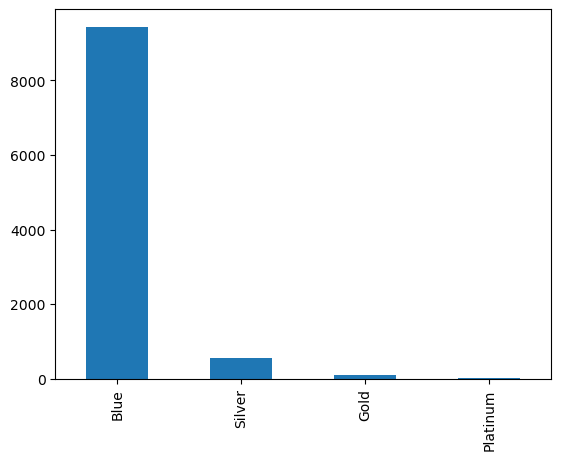

In [17]:
df.Card_Category.value_counts().plot(kind='bar');


### Months On Book

How long customer has been on the books. (Integer)


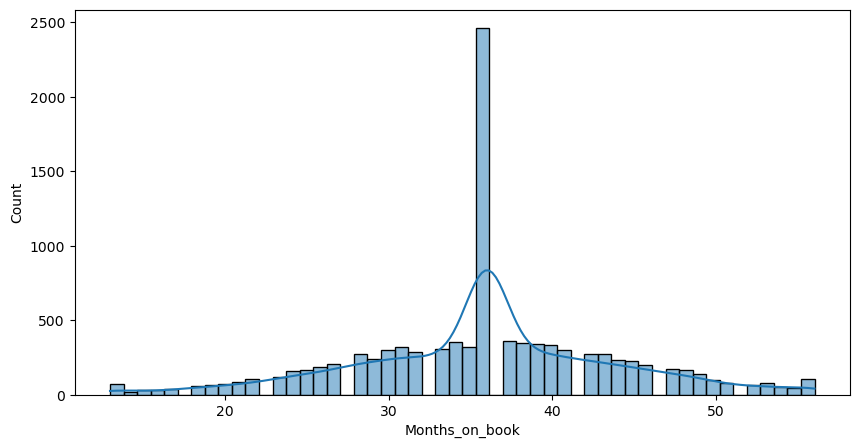

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(x='Months_on_book',data=df,kde=True);

The difference is not significant

C:\Users\ziyad\AppData\Local\Temp\ipykernel_832\3473811730.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



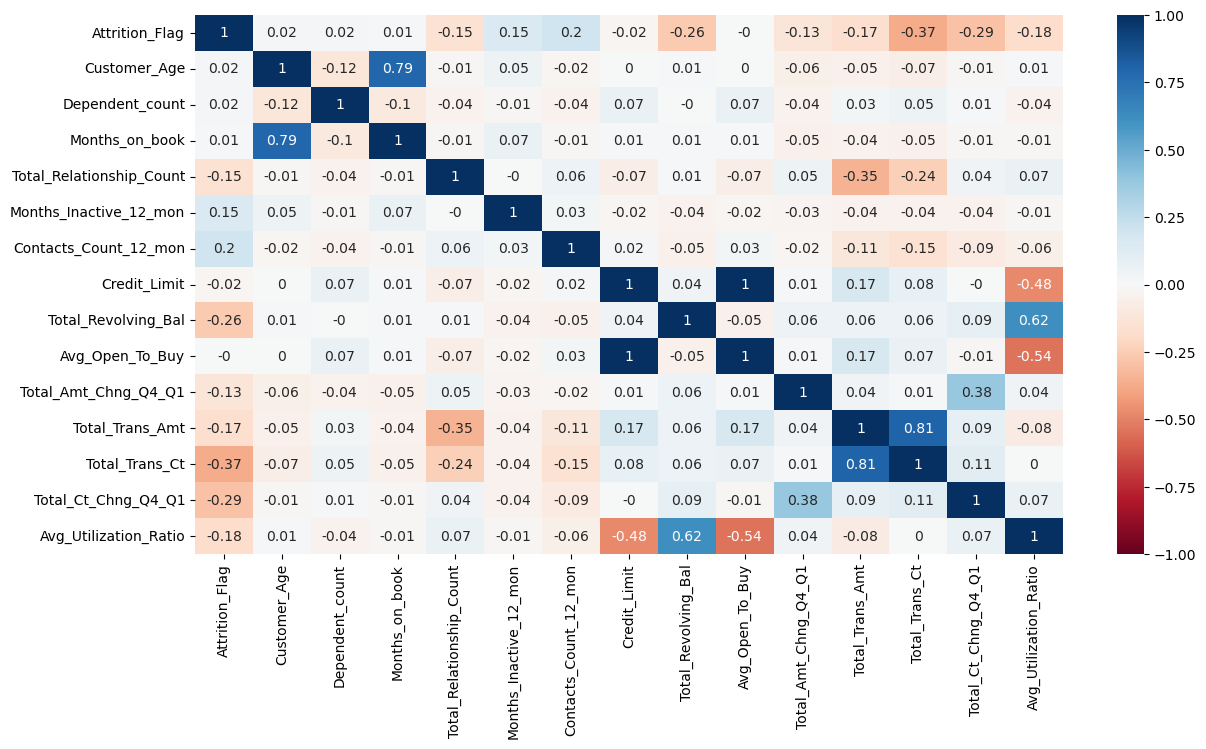

In [20]:
correlation = df.loc[:, ~df.columns.isin(['CLIENTNUM'])].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
plt.show()


In [21]:
# Converting the columns that have object data to numeric values
from sklearn.preprocessing import LabelEncoder

obj_num = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
le = LabelEncoder()
for column in obj_num:
    df[column] = le.fit_transform(df[column])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Applying Machine Learning

#### Naive Bayes for a baseline

In [22]:
# Initializing the x, y df for predictions.

x = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']
x.shape, y.shape

((10127, 20), (10127,))

In [23]:
x.head(10)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,51,1,4,6,1,0,1,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,32,1,0,3,3,2,3,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,37,1,3,5,2,2,0,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,48,1,2,2,2,3,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [24]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Attrition_Flag, dtype: int64

In [25]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

X = StandardScaler().fit_transform(x)
X[:3]

array([[ 8.02878101e-01, -1.65405580e-01,  1.05995565e+00,
         5.03368127e-01, -5.26365976e-02, -6.28127573e-01,
        -5.74181504e-01, -2.59473284e-01,  3.84620878e-01,
         7.63942609e-01, -1.32713603e+00,  4.92403766e-01,
         4.46621903e-01, -4.73422218e-01,  4.88970818e-01,
         2.62349444e+00, -9.59706574e-01, -9.73895182e-01,
         3.83400260e+00, -7.75882235e-01],
       [ 2.15686101e+00,  3.33570383e-01, -9.43435701e-01,
         2.04319867e+00, -5.97678339e-01,  7.27305611e-01,
         7.55052944e-01, -2.59473284e-01,  1.01071482e+00,
         1.40730617e+00, -1.32713603e+00, -4.11615984e-01,
        -4.13666521e-02, -3.66666822e-01, -8.48598788e-03,
         3.56329284e+00, -9.16432607e-01, -1.35734038e+00,
         1.26085729e+01, -6.16275655e-01],
       [-6.82768542e-01,  5.83058365e-01,  1.05995565e+00,
         5.03368127e-01, -5.97678339e-01, -6.28127573e-01,
         9.04357198e-02, -2.59473284e-01,  8.96451285e-03,
         1.20579050e-01, -1.3

In [26]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44, shuffle =True)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7088, 20), (3039, 20), (7088,), (3039,))

In [27]:
# Applying Naive Bayes for a baseline evaluation

NB = GaussianNB()
NB.fit(x_train,y_train)
NB.score(x_train,y_train), NB.score(x_test,y_test)

(0.8895316027088036, 0.8874629812438302)

In [28]:
y_pred_NB=NB.predict(x_test)
print(y_pred_NB[:10])
print('\n')
print(y_test[:10])


[0 0 0 0 0 0 0 0 1 0]


1118    0
7680    0
9174    0
1073    0
463     1
6857    0
1368    0
8649    0
2282    0
9817    1
Name: Attrition_Flag, dtype: int64


C:\Users\ziyad\AppData\Local\Temp\ipykernel_832\3737167660.py:4: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



[[2372  178]
 [ 164  325]]


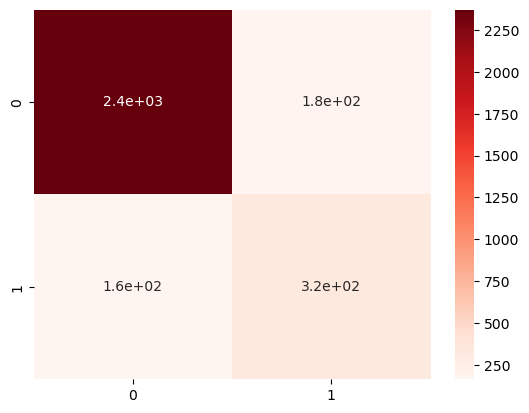

In [29]:
# Confusion matrix to check for result

confusion_matrix_model=confusion_matrix(y_test,y_pred_NB)
print(confusion_matrix_model)
sns.heatmap(confusion_matrix_model,annot=True,cmap='Reds');

In [30]:
# Accuracy, Precision, Recall, F1 score

df_NB = pd.DataFrame(classification_report(y_pred_NB,y_test, digits=2,output_dict=True)).T

df_NB['support'] = df_NB.support.apply(int)

df_NB.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.930196,0.935331,0.932757,2536
1,0.664622,0.646123,0.655242,503
accuracy,0.887463,0.887463,0.887463,0
macro avg,0.797409,0.790727,0.793999,3039
weighted avg,0.886240,0.887463,0.886824,3039


In [31]:
# Calculating the Specifity score

confusion_NB=confusion_matrix(y_test, y_pred_NB)
TP = confusion_NB[1, 1]
TN = confusion_NB[0, 0]
FP = confusion_NB[0, 1]
FN = confusion_NB[1, 0]

specificity = TN / (TN + FP)
print('The Specifity values is ' + str(specificity))

The Specifity values is 0.9301960784313725


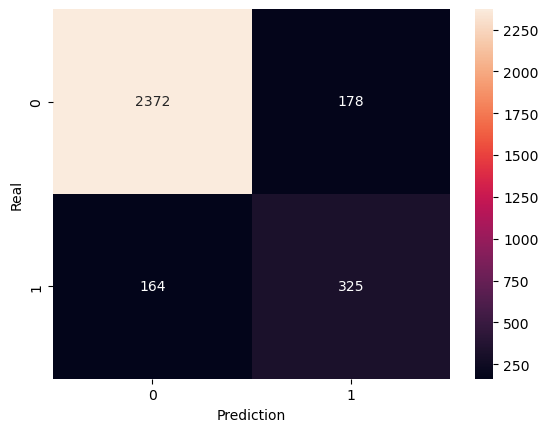

In [32]:
# Heatmap for NB

sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

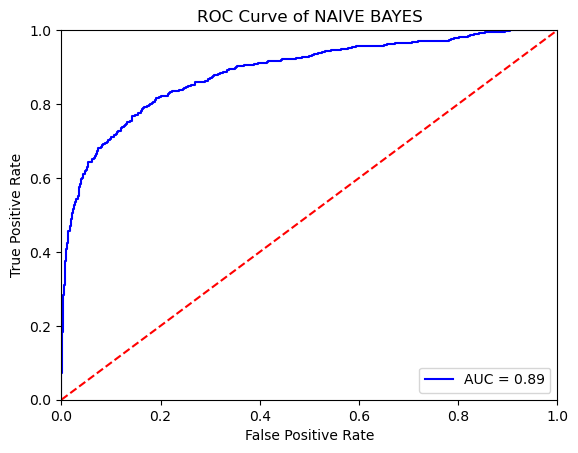

In [33]:
# ROC Curve of Naive Bayes

Y_scores = NB.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Naive Bayes Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of NAIVE BAYES')
plt.show()

#### Logistic Regression

In [34]:
# Creating test and train splits for Logistic Regression.

x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state =44 )
lr = LogisticRegression(penalty=None)
lr.fit(x_train, y_train); 
y_predict_lr = lr.predict(x_test)
y_lr_pred_prob = lr.predict_proba(x_test)
print(y_predict_lr)
print('\n')
print(y_lr_pred_prob)

[0 1 0 ... 0 0 0]


[[0.99010168 0.00989832]
 [0.328087   0.671913  ]
 [0.99494878 0.00505122]
 ...
 [0.93217077 0.06782923]
 [0.99490986 0.00509014]
 [0.89076179 0.10923821]]


In [35]:
# Specifity Score Calculation

confusion_lr=confusion_matrix(y_test, y_predict_lr)
TP = confusion_lr[1, 1]
TN = confusion_lr[0, 0]
FP = confusion_lr[0, 1]
FN = confusion_lr[1, 0]

specificity_lr = TN / (TN) + FP
print('The Specifity score is ' + str(specificity_lr))


The Specifity score is 69.0


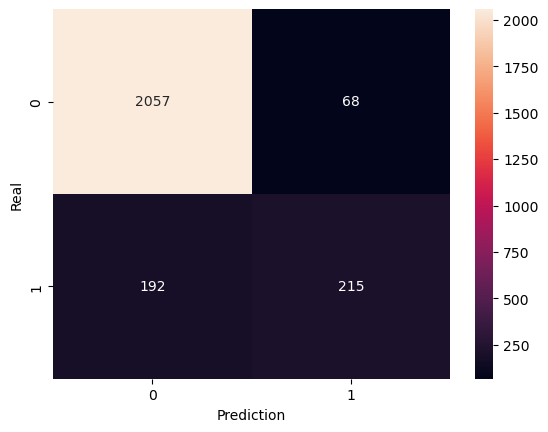

In [36]:
# Heat Map

sns.heatmap(confusion_matrix(y_test, y_predict_lr), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');


In [37]:
# Accuracy, Precision, Recall, F1 score

df_logR = pd.DataFrame(classification_report(y_predict_lr,y_test, digits=2,output_dict=True)).T

df_logR['support'] = df_logR.support.apply(int)

df_logR.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.968000,0.914629,0.940558,2249
1,0.528256,0.759717,0.623188,283
accuracy,0.897314,0.897314,0.897314,0
macro avg,0.748128,0.837173,0.781873,2532
weighted avg,0.918850,0.897314,0.905086,2532


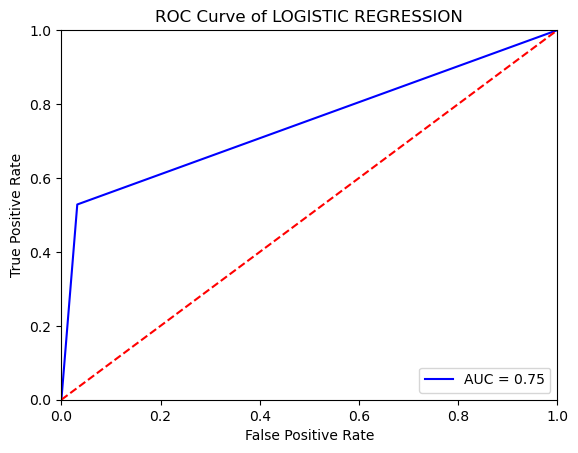

In [38]:
# ROC Curve of Logistic Regression

Y_scores = lr.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_lr)
roc_auc = auc(fpr, tpr)

plt.title('Logistic RegressionClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.show()

### KNN

In [39]:
# Creating Test and Train split for KNN.

x_train, x_test, y_train, y_test = train_test_split(X,y,stratify=y)


In [40]:
# Fucntion to check for different K - Nearest neighbors

def knn_scores(X, y, start, stop, step):
    list_scores = []
    for i in range(start,stop,step):
        model = KNeighborsClassifier(n_neighbors=i)
        kfold = KFold(n_splits=10, shuffle=True, random_state=44)
        cross_val_scores_KNN = cross_val_score(model, X,y,cv=kfold)
        dict_row_score = {'mean_score': np.mean(cross_val_scores_KNN), 'std_score': np.std(cross_val_scores_KNN), 'n_neighbours' :i}
        list_scores.append(dict_row_score)

    df_knn_scores = pd.DataFrame(list_scores)

    df_knn_scores['Lower_Bound'] = df_knn_scores['mean_score'] - df_knn_scores['std_score']
    df_knn_scores['Upper_Bound'] = df_knn_scores['mean_score'] + df_knn_scores['std_score']

    return df_knn_scores


In [41]:
# Try 1 to 20 neigbours
df_knn_scores = knn_scores(x_train, y_train, 1, 21, 1)

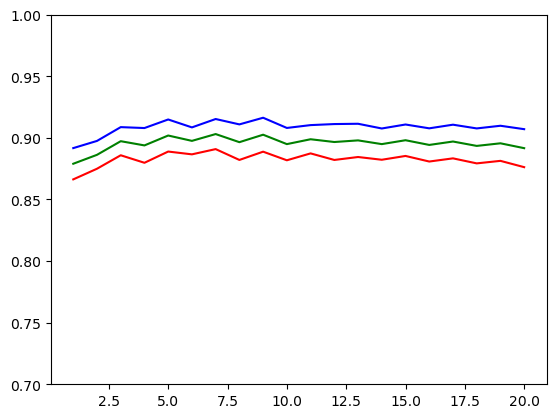

In [42]:
# Plotting best scorses.

plt.plot(df_knn_scores['n_neighbours'], df_knn_scores['Lower_Bound'], color ='r')
plt.plot(df_knn_scores['n_neighbours'], df_knn_scores['mean_score'], color ='g')
plt.plot(df_knn_scores['n_neighbours'], df_knn_scores['Upper_Bound'], color ='b')
plt.ylim(0.7,1);

In [43]:
# Check the hyperparameter with the higher score
df_knn_scores.loc[df_knn_scores.mean_score == df_knn_scores.mean_score.max()]

,mean_score,std_score,n_neighbours,Lower_Bound,Upper_Bound
6,0.903098,0.012213,7,0.890886,0.915311


In [44]:
best_k = df_knn_scores.loc[df_knn_scores.mean_score == df_knn_scores.mean_score.max(), 'n_neighbours'].values[0]
print('The best K is ' + str(best_k)) 
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train, y_train)

The best K is 7


KNeighborsClassifier(n_neighbors=7)

In [45]:
# Applying the model

y_knn_predict = model.predict(x_test)

In [46]:
# Calculating the Specificity score. 

confusion_knn=confusion_matrix(y_test, y_knn_predict)
TP = confusion_knn[1, 1]
TN = confusion_knn[0, 0]
FP = confusion_knn[0, 1]
FN = confusion_knn[1, 0]

specificity_knn = TN / (TN + FP)
print('The Specificity Score is ' + str(specificity_knn))

The Specificity Score is 0.9821176470588235


In [47]:
# Accuracy, Precision, Recall, F1 score

df_KNN = pd.DataFrame(classification_report(y_knn_predict,y_test, digits=2,output_dict=True)).T

df_KNN['support'] = df_KNN.support.apply(int)

df_KNN.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.982118,0.910956,0.945199,2291
1,0.498771,0.842324,0.626543,241
accuracy,0.904423,0.904423,0.904423,0
macro avg,0.740445,0.876640,0.785871,2532
weighted avg,0.936112,0.904423,0.914869,2532


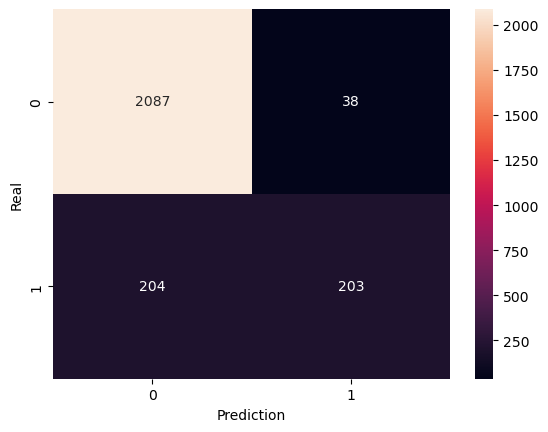

In [48]:
# Heat Map for KNN

sns.heatmap(confusion_matrix(y_test, y_knn_predict), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

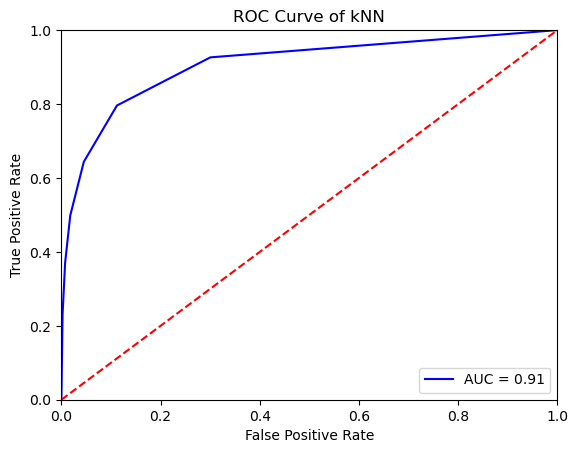

In [49]:
# ROC Curve of KNN

y_scores = model.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## Conclusion

### 1. We can see that both models perform better than the baseline.

### 2. Given the fact that we are trying to identify clients with a possible attrition, our lead metric should be the Recall Sensitivity of the model (If we are going to personalize a retention campaign, the false positives shouldn't be be a problem as long as I don't miss the true positives).

#### 3. The logistic regression model has the same recall sensitivity as the KNN model, but the KNN model has a better precision and overall performance.

### 4. In this case I would choose the KNN model to identify the users with a possible attrition.